Zadanie1: Oblicz P(B=T, T=A, A=T, J=T, M=F)

P(B=T)= 0.001
P(T=A)= 0.002
P(A=T)= P(A=T|B,E=T,T) = 0.95
P(J=T)= P(J=T|A=T) = 0.9
P(M=F)= 0.3


In [6]:
wynik = 0.001 * 0.002 * 0.95 * 0.9 * 0.3
print(wynik)

5.13e-07


Zadanie2: (oszędność parametrów):
Ile potrzeba parametrów aby opisać rozkład łączny 5 zmiennych binarnych?
Ile parametrów ma powyższa sieć?

Ze względu na to, że są to zmienne binarne, w przypadku 5 zmiennych parametrów jest 10 (bo każda zmienna ma po 2), do opisania rozkładu wystarczy 5 parametrów - jedna wartość niesie informację również o tej drugiej wartości, bo są one swoimi przeciwieństwami - np. 0.1 i 0.9 
Powyższa sieć ma sześć parametrów - B, A, J, M, T, E? ale tylko dwa z nich są niezależne - B i E, w związku z czym za ich pomocą można opisać całą resztę

Zadanie3: Wykonaj analogiczne zadanie dla 10 zmiennych binarnych i następującej topologii sieci: ...
Ile potrzeba parametrów aby opisać rozkład łączny 10 zmiennych binarnych? Ile parametrów ma powyższa sieć?

Liczba parametrów = 10x2 -> 20
Ze względu na budowę sieci i to, że wszystkie parametry są zależne od jednego, który jest na samej górze, możemy zredykować liczbę zmiennnych do jednej - właśnie tej, która stanowi wierzchołek sieci

Zadanie4: Wyjaśnij wartość 0.75 w powyższej tabeli (poprzez bezpośrednie wyliczenie i objaśnienie).

ilość dużych bananów = 8, ilość dużych smacznych bananów = 6, wynik dzielenia 6/8 daje 0.75

Zadanie5: Wygeneruj dane zawierające 10 tys wierszy i 3 kolumny. Pierwsze dwie kolumny (A, B) niech zawierają losowe liczby całkowite z zakresu <-2, 2> Trzecia kolumna (C) to kombinacja liniowa dwóch pierwszych kolumn C = 2A - 3B. 
Zbuduj dwie topologie sieci, tzn. (A-> C, B- > C) oraz (A-> B, B- > C)  . Oceń która z sieci wydaje sie lepiej odzwierciedlać strukturę danych. Wyjaśnij dlaczego.

In [35]:
from random import randint
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import BDeuScore, K2Score, BicScore

In [36]:
A = [randint(-2, 2) for i in range(0, 10000)]
B = [randint(-2, 2) for i in range(0, 10000)]
C =[]
for i in range (10000):
    C.append(2*A[i] - 3*B[i])

In [37]:
data = {'A':A,'B':B,'C':C}
dataframe = pd.DataFrame(data)
print(dataframe)

      A  B  C
0    -1  2 -8
1     2 -1  7
2     1 -2  8
3    -1  2 -8
4     1  2 -4
...  .. .. ..
9995 -1  0 -2
9996 -2  1 -7
9997 -2 -2  2
9998  1  0  2
9999  0  0  0

[10000 rows x 3 columns]


In [38]:
#net1: (A-> C, B- > C) 
net1 = BayesianNetwork([('A', 'C'), ('B', 'C')])
net1.fit(dataframe, estimator=BayesianEstimator, prior_type="BDeu")

In [39]:
#net2: (A-> B, B- > C)
net2 = BayesianNetwork([('A', 'B'), ('B', 'C')])
net2.fit(dataframe, estimator=BayesianEstimator, prior_type="BDeu")

In [40]:
#Ocena modelu
bdeu = BDeuScore(dataframe)
k2 = K2Score(dataframe)
bic = BicScore(dataframe)

In [41]:
print("bdeu score:", bdeu.score(net1))
print("k2 score:", k2.score(net1))
print("bic score:", bic.score(net1))

bdeu score: -32343.19600629246
k2 score: -34009.33915345037
bic score: -34291.28350479371


In [42]:
print("bdeu score:", bdeu.score(net2))
print("k2 score:", k2.score(net2))
print("bic score:", bic.score(net2))

bdeu score: -48492.14473534367
k2 score: -48757.61394827544
bic score: -48776.880143588976


Im większe wartości współczynników tym lepszy model -> sieć net1 wypadła lepiej, lepiej odzwierciedla strukturę danych
Jest tak dlatego, że w tej sieci zbiór danych C jest zależny od zbioru A i zbioru B, tak jak jest w rzeczywistości - C został wygenerowany na podstawie A i B

Zadanie6: Liczba możliwych topologii sieci dla n cech wyraża się następującyc wzorem rekurencyjnym:

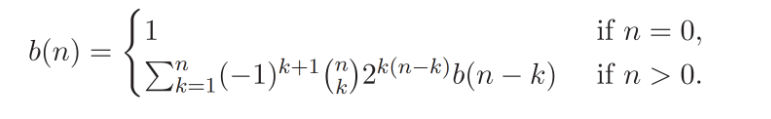

In [2]:
from IPython.display import Image
Image(filename='bay.png') 

Zaimplementuj ten wzór oraz sprawdź go dla 3 cech (przyklad wyżej). Ile możliwych sieci występuje dla 10 cech?


In [3]:
from scipy.special import binom

In [4]:
def func(n):
    if n==0:
        return 1
    else:
        sum= 0
        for k in range(1, n+1):
            sum += (-1)**(k+1) * binom(n,k) * 2 ** (k* (n-k)) * func(n-k)
        return sum
    

In [5]:
print("Dla 3 cech:", func(3))
print("Dla 10 cech:", func(10))


Dla 3 cech: 25.0
Dla 10 cech: 4.175098976430598e+18
